In [13]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
#pip install lifelines

In [15]:
df = pd.read_csv('merged_DateFrames.csv',index_col=None,low_memory=False)

In [3]:
df["Whelp Date"] = pd.to_datetime(df["Whelp Date"], format="%d/%m/%Y")

In [4]:
df["NoticeSentBy"] = pd.to_datetime(df["NoticeSentBy"], format="%d/%m/%Y %H:%M")

In [5]:
df["Time"] = ((df["NoticeSentBy"] - df["Whelp Date"]).dt.total_seconds() / (24 * 60 * 60)).astype(int)

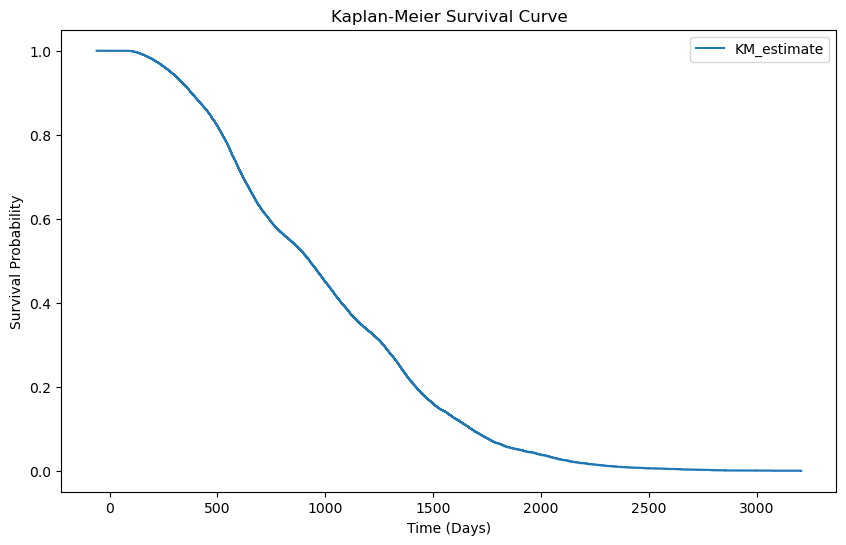

   test_statistic    p  -log2(p)
0             0.0  1.0      -0.0


In [6]:
# Create Kaplan-Meier survival curves
kmf = KaplanMeierFitter()
kmf.fit(df["Time"], event_observed=(df["Retirement Type"] != "RAC"))

# Plot Kaplan-Meier survival curve
plt.figure(figsize=(10, 6))
kmf.plot()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Probability")
plt.show()

# Perform log-rank test
results = logrank_test(df["Time"], df["Time"], event_observed_A=(df["Retirement Type"] != "RAC"), event_observed_B=(df["Retirement Type"] != "RAC"))
print(results.summary)


### Kaplan-Meier Survival Curves:

The Kaplan-Meier survival curve is a graphical representation of the probability of survival over time in a group of subjects. It's commonly used in survival analysis to visualize how the probability of an event (such as death, failure, or retirement) changes over different time intervals. The curve provides insights into the survival experience of a population or a specific group within it.

Here's how the Kaplan-Meier survival curve is constructed:

1. **Time Intervals:** The time axis is divided into discrete intervals (time points) where events can occur.

2. **Probability Calculation:** For each time interval, the probability of surviving (not experiencing the event) up to that point is calculated. This is done by taking the product of the probabilities of surviving in all previous intervals.

3. **Plotting:** The calculated survival probabilities are plotted against the corresponding time intervals to create the Kaplan-Meier curve.

4. **Censored Data:** The curve accounts for censored data points, which occur when subjects are lost to follow-up or the event hasn't occurred by the end of the study.

### Log-Rank Test:

The log-rank test is a statistical test used to compare the survival experiences of two or more groups in a survival analysis. It assesses whether there are significant differences in the survival probabilities between the groups.

Here's how the log-rank test works:

1. **Hypotheses:** The null hypothesis (H0) assumes that there is no difference in survival between the groups being compared. The alternative hypothesis (Ha) suggests that there is a difference in survival between the groups.

2. **Observed vs. Expected Events:** The test calculates the observed number of events (deaths, failures, etc.) and the expected number of events for each group based on the Kaplan-Meier estimates.

3. **Chi-Square Test:** The log-rank test statistic is calculated as a chi-square statistic, comparing the observed and expected events across the groups.

4. **P-Value:** The test statistic is used to calculate a p-value. If the p-value is smaller than a pre-defined significance level (e.g., 0.05), you reject the null hypothesis and conclude that there is a significant difference in survival experiences among the groups.

The log-rank test is non-parametric and doesn't assume any specific distribution of survival times. It's commonly used to compare survival curves between treatment groups, different cohorts, or any other categorical variable of interest.

In the context of your data (greyhound retirements), you can use the Kaplan-Meier curve to visualize how the probability of retirement changes over time, and then perform the log-rank test to compare the retirement experiences of different groups (e.g., different colors, sexes, or other relevant categories). If the p-value from the log-rank test is low, it suggests that there are significant differences in the retirement experiences of the groups being compared.

In [16]:


# Select columns with categorical data types (object or category)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print the names of categorical columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['GreyhoundName', 'Earmark', 'Reg Date', 'Colour', 'Sex_x', 'Whelp Date',
       'Retirement Type', 'Status Meaning', 'NoticeSentBy'],
      dtype='object')


In [17]:
df

,GreyhoundName,Earmark,Reg Date,Active?,Colour,Sex_x,Whelp Date,Retirement Type,Status Meaning,NoticeSentBy
0,ANNAS LUCKY GIRL,QDBAJ,29/09/2015,True,bd,B,05/04/2015,RAC,Licence Unsuspended,28/02/2022 06:30
1,NELLIES BOSS,QPRPR,25/01/2016,True,bk,D,17/03/2015,NEW,Transfer is complete,15/02/2022 06:03
2,NELLIES BOSS,QPRPR,25/01/2016,True,bk,D,17/03/2015,NEW,Transfer is complete,16/02/2022 06:04
3,NELLIES BOSS,QPRPR,25/01/2016,True,bk,D,17/03/2015,NEW,Transfer is complete,17/02/2022 06:03
4,NELLIES BOSS,QPRPR,25/01/2016,True,bk,D,17/03/2015,NEW,Transfer is complete,18/02/2022 06:03
...,...,...,...,...,...,...,...,...,...,...
951451,IVY HILL MONARCH,YVUBN,20/01/2022,True,wbe,D,20/01/2022,RAC,Still at premises,16/09/2022 07:33
951452,SPRINGHILL GRACE,YDPJE,21/04/2022,True,wbk,B,21/04/2022,RAC,Still at premises,28/07/2022 07:34
951453,SPRINGHILL GRACE,YDPJE,21/04/2022,True,wbk,B,21/04/2022,RAC,Still at premises,29/07/2022 07:32
951454,SPRINGHILL GRACE,YDPJE,21/04/2022,True,wbk,B,21/04/2022,RAC,Still at premises,29/07/2022 07:33


In [20]:

# Select categorical columns for one-hot encoding
categorical_columns = ['Whelp Date','Retirement Type']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [21]:
from sklearn.preprocessing import StandardScaler

# Assuming you have already converted date columns to datetime
df['NoticeSentBy'] = pd.to_datetime(df['NoticeSentBy'])
df['Whelp Date'] = pd.to_datetime(df['Whelp Date'])

# Extract numerical columns for standardization
numerical_columns = ['NoticeSentBy', 'Whelp Date']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


C:\Users\Daniel Maher\AppData\Local\Temp\ipykernel_12500\1484455525.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Whelp Date'] = pd.to_datetime(df['Whelp Date'])


In [22]:
# The df_encoded DataFrame contains one-hot encoded columns
# The df DataFrame contains standardized numerical columns

# Combine the two DataFrames
final_df = pd.concat([df_encoded, df[numerical_columns]], axis=1)

# Now you have your final preprocessed dataset for modeling


In [23]:
final_df

Unexpected exception formatting exception. Falling back to standard exception
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "E:\anaconda3\Lib\site-packages\IPython\core\formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\anaconda3\Lib\site-packages\IPython\core\formatters.py", line 708, in __call__
    printer.pretty(obj)
  File "E:\anaconda3\Lib\site-packages\IPython\lib\pretty.py", line 410, in pretty
    return _repr_pprint(obj, self, cycle)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\anaconda3\Lib\site-packages\IPython\lib\pretty.py", line 778, in _repr_pprint
    output = repr(obj)
             ^^^^^^^^^
  File "E:\anaconda3\Lib\site-packages\pandas\core\frame.py", line 1064, in __repr__
    return self.to_string(**repr_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\anaconda3\Lib\site-packages\pandas\core\frame.py", line 1227, in to_string
    formatter = fmt.DataFrameFormatter(
                ^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\anaconda3\Lib\site-packages\p

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
#pip install tensorflow

In [9]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [10]:
dataset = loadtxt('merged_DateFrames.csv',delimiter =',')

ValueError: could not convert string 'ï»¿GreyhoundName' to float64 at row 0, column 1.

In [ ]:
# split into input (X) and output (y) variables
# must be in array format
X = dataset[:,0:8]
y = dataset[:,8]

In [7]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))  # Adjust the input_dim according to your feature dimension
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

NameError: name 'input_dim' is not defined